# Systèmes Linéaires Invariants dans le Temps, à temps discret
## Invariance dans le temps

Un système est invariant dans le temps (Time Invariant : TI), ssi :

$${\cal H}\{x[n]\} = y[n] \Leftrightarrow \forall n_o, {\cal H}\{x[n-n_o]\} = y[n-n_o]$$

Par exemple : $y[n] = {\cal H}\{x[n]\}= x[n-3] - x[n-7]$ est un système TI.  Le bout de code ci-dessous le montre.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def system(x):
    delai=7                               # Le délai est là uniquement parce qu'on ne peut pas avoir
                                          # d'indices négatifs en python
    out = x[delai-3::]-x[delai-7:-4:]
    return out

delai=7
x_original=np.random.sample((40,1))

for no in range(10):                     # On utilise en fait x[n+no], car on ne peut pas avoir d'indice négatif
    x=x_original[no::]
    sysout=system(x)
    y=system(x_original)
    y=y[no::]
    print('décalage : ',no,'différence entre sortie du système et y décalé : ',np.sum(np.abs(sysout-y)))





décalage :  0 différence entre sortie du système et y décalé :  0.0
décalage :  1 différence entre sortie du système et y décalé :  0.0
décalage :  2 différence entre sortie du système et y décalé :  0.0
décalage :  3 différence entre sortie du système et y décalé :  0.0
décalage :  4 différence entre sortie du système et y décalé :  0.0
décalage :  5 différence entre sortie du système et y décalé :  0.0
décalage :  6 différence entre sortie du système et y décalé :  0.0
décalage :  7 différence entre sortie du système et y décalé :  0.0
décalage :  8 différence entre sortie du système et y décalé :  0.0
décalage :  9 différence entre sortie du système et y décalé :  0.0


Dans la cellule ci-dessous, vérifiez que les systèmes:
  <li> ${\cal H}\{x[n]\} = x[4 n + 2]$
  <li> ${\cal H}\{x[n]\} = x[n] e^{\jmath 2 \pi n/10}$
ne sont pas invariants dans le temps

Avec le premier système, on compare visuellement les deux sorties. On ne peut pas faire la différence comme avec le second système car les résultats sous forme de tableau n'ont pas la même taille.

Dans les deux cas, on remarque que le système n'est pas TI. 

In [7]:
x_original=np.arange(40)

######### systeme 1 ##########
def system(x):
                     # Définition du système : H(x(n)) = x(4 n + 2 )
    out= x[2::4]
    return out

print('x : ',x_original.T)

for no in range(10):
    x=x_original[no::]
    sysout=system(x)
    y=system(x_original)
    y=y[no::]
    print('no:', no, 'sys : ', sysout.T, 'y décalé : ',y.T)
# On voit que les deux sorties sont différentes

######### systeme 2 ########
def system2(x):
      # Définition du système : H(x(n)) = x( n  )exp(j 2 pi n /10)
    out=x*np.exp(2j*np.pi*np.arange(x.size)/10)
    return out

print('x : ',x_original.T)

for no in range(10):
    x=x_original[no::]
    sysout=system2(x)
    y=system2(x_original)
    y=y[no::]
    print('décalage : ',no,'différence entre sortie du système et y décalé : ',np.sum(np.abs(sysout-y)))
# On voit que les deux sorties sont différentes

    

x :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
no: 0 sys :  [ 2  6 10 14 18 22 26 30 34 38] y décalé :  [ 2  6 10 14 18 22 26 30 34 38]
no: 1 sys :  [ 3  7 11 15 19 23 27 31 35 39] y décalé :  [ 6 10 14 18 22 26 30 34 38]
no: 2 sys :  [ 4  8 12 16 20 24 28 32 36] y décalé :  [10 14 18 22 26 30 34 38]
no: 3 sys :  [ 5  9 13 17 21 25 29 33 37] y décalé :  [14 18 22 26 30 34 38]
no: 4 sys :  [ 6 10 14 18 22 26 30 34 38] y décalé :  [18 22 26 30 34 38]
no: 5 sys :  [ 7 11 15 19 23 27 31 35 39] y décalé :  [22 26 30 34 38]
no: 6 sys :  [ 8 12 16 20 24 28 32 36] y décalé :  [26 30 34 38]
no: 7 sys :  [ 9 13 17 21 25 29 33 37] y décalé :  [30 34 38]
no: 8 sys :  [10 14 18 22 26 30 34 38] y décalé :  [34 38]
no: 9 sys :  [11 15 19 23 27 31 35 39] y décalé :  [38]
x :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
décalage :  0 différence 

## Convolution, réponse impulsionnelle et équation aux différences à coefficients constants

Soit la {\em réponse impulsionnelle}, définie par 
$$ h[n] = {\cal H}\{\delta[n]\}$$

Sachant qu'on peut écrire tout signal discret par : 
$x[n] = \sum_k x[k] \delta[n-k]$

Par linéarité et invariance dans le temps :

$$y[n] = {\cal H}\{x[n]\} = \sum_k x[k] h[n-k]$$



En python, la convolution est définie dans la bibliothèque signal, comme indiqué ci-dessous :



Text(0.5,1,'$y(n)=h(n)$')

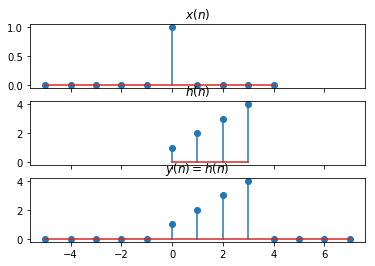

In [8]:
from scipy import signal
x=np.zeros(10)
x[5]=1
h=np.arange(1,5)
y=signal.convolve(x,h)
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)

ax_orig.stem(np.arange(-5,5),x)
ax_orig.set_title('$x(n)$')
ax_win.stem(h)
ax_win.set_title('$h(n)$')
ax_filt.stem(np.arange(-5,8),y)
ax_filt.set_title('$y(n)=h(n)$')


<li>Utilisez cette fonction pour effectuer un filtrage avec un signal $x[n]$ qui ne soit pas un impulsion (par exemple un signal de longueur 5.
 <li> Implémentez l'équation aux différences définie par :
     $$y[n] = {\cal H}\{x[n]\} = \sum_k x[k] h[n-k]$$
      et vérifiez que le résultat est identique à la convolution calculée précédemment

Pour appliquer la convolution on code directement la formule donnée. Par soucis de compatibilité entre les signaux, on ajoute des '0' à la fin de x et h.

On remarque que la convolution codée donne le même résultat que la convolution incluse dans python. On va donc pouvoir utiliser la fonction convolve à l'avenir.

x_or par convolution python    [ 0.  3.  8.  1. -1.  0.  0.  0.]
h par implémentation directe : [1 2 3 4 0 0 0 0]
y par convolution python :     [ 0.  3. 14. 26. 37. 33.  1. -4.]
y par implémentation directe : [ 0.  3. 14. 26. 37. 33.  1. -4.]
*on vérifie que les deux résultats sont identiques*


Text(0.5,1,'$y(n)$ basé sur la convolution - itérations')

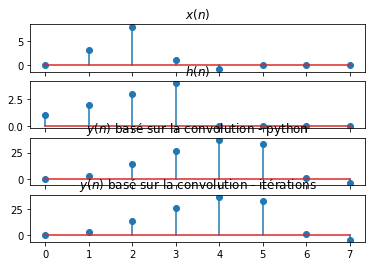

In [9]:
# Définition arbitraire de x

x_or=np.array([0.0 ,3.0 ,8.0, 1.0, -1.0])
h=np.arange(1,5)
# calcul de y par convolution "python"
y=signal.convolve(x_or,h)

# calcul de y par la formule directe de la convolution
# initialiser la sortie à 0
y_c=np.zeros(x_or.size+h.size-1)
 # ajouts de zéros à la fin de x et h pour 
                                           # ne pas devoir jouer sur le test d'indices à la fin

x_or=np.pad(x_or, (0, y_c.size-x_or.size), 'constant')
h=np.pad(h, (0, y_c.size-h.size), 'constant')

# appliquer l'expression de la convolution
for i in range(y_c.size):
    for k in range(i+1):
        y_c[i]+=x_or[k]*h[i-k]
        
#x_or=x_or[x_or.size-(x_or.size-y_c.size)]
print('x_or par convolution python   ',x_or)
print('h par implémentation directe :',h)
print('y par convolution python :    ',y)
print('y par implémentation directe :',y_c)
print('*on vérifie que les deux résultats sont identiques*')

fig, (ax_orig, ax_win, ax_filt, ax_conv) = plt.subplots(4, 1, sharex=True)

ax_orig.stem(np.arange(8),x_or)
ax_orig.set_title('$x(n)$')
ax_win.stem(h)
ax_win.set_title('$h(n)$')
ax_filt.stem(np.arange(y.size),y)
ax_filt.set_title('$y(n)$ basé sur la convolution - python')
ax_conv.stem(np.arange(y_c.size),y_c)
ax_conv.set_title('$y(n)$ basé sur la convolution - itérations')

## Filtre récursif : implémentation par l'équation aux différences

Un filtre récursif peut être décrit par son équation aux différences :

$$ a_o y[n] =  \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N} a_k y[n-k] $$

Ce filtre récursif peut être implémenté, en python, avec la fonction scipy.signal.lfilter, par exemple, dans le cas de l'intégrateur à fuite :

$$ y[n] = \lambda y[n-1] + (1-\lambda)x[n]$$

donc, $a_o=1, a_1 = -\lambda, b_o = (1-\lambda)$


**Complétez la cellule ci-dessous pour vérifier que l'équation aux différences donne le même résultat que la fonction lfilter.**

*Dans un premier temps, il y aura une différence - vérifiez l'impact de la condition initiale (zi = [lamda])*

On applique la formule du filtre et en superposant les deux signaux on remarque une différence proportionnelle entre lfilter et notre formule. Cette différence est nulle en lamda=1 et quand lamda tend vers 0. 

On remarque que lfilter commence toujours avec la première valeure à 1 pour lamda compris entre 0 et 1. C'est cela qui cause la différence observée.

[1.         0.9        0.81       0.729      0.6561     0.59049
 0.531441   0.4782969  0.43046721 0.38742049 0.34867844 0.3138106
 0.28242954 0.25418658 0.22876792 0.20589113 0.18530202 0.16677182
 0.15009464 0.13508517]
[0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91
 0.91 0.91 0.91 0.91 0.91 0.91]


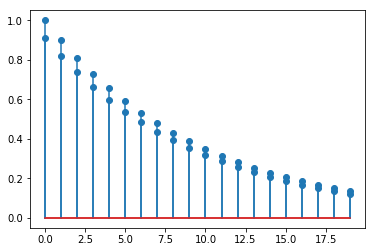

In [10]:

lamda=0.9
a=np.array([1,-lamda])
b=np.array([1-lamda])

xn=np.zeros(20)
xn[0]=1

z, _ = signal.lfilter(b, a, xn,zi=[lamda])

plt.stem(z)

print(z)


y=np.zeros(z.size)
#initialisation de la premiere valeur
y[0]=lamda*lamda+(1-lamda)*xn[0]
#on applique la formule
for i in range (1,y.size):
    y[i]=lamda*y[i-1]+(1-lamda)*xn[i]
plt.stem(y)


print(y/z)



### Constatations
On remarque que les deux sorties sont égales à une constante multiplicative près.  Après relecture attentive de la documentation concernant *lfilter*, on fixe *zi* à 0.  Le résultat est correct.



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


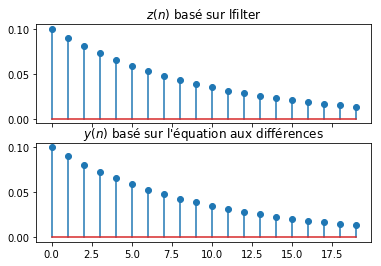

In [11]:
z, _ = signal.lfilter(b, a, xn,zi=[0])
fig, (ax_orig, ax_conv) = plt.subplots(2, 1, sharex=True)

y=np.zeros(z.size)

y[0]=(1-lamda)*xn[0]
for i in range (1,y.size):
    y[i]=lamda*y[i-1]+(1-lamda)*xn[i]
    
ax_orig.stem(z)
ax_orig.set_title('$z(n)$ basé sur lfilter')
ax_conv.stem(y)
ax_conv.set_title('$y(n)$ basé sur l\'équation aux différences ')
print(y/z)


##  Réponse fréquentielle

Dans cette partie du devoir, vous allez tracer les réponses fréquentielles du filtre présenté dans les transparents, et vérifiez que le résultat du filtrage est cohérent (en fréquence).  Vous allez donc reproduire les figures des transparents 174, à 178.

Ci dessous, vous trouverez la génération du signal bruité ainsi que sa représentation fréquentielle.  A titre d'exemple, vous trouverez également la représentation fréquentielle du filtre MA et de l'intégrateur à fuite..


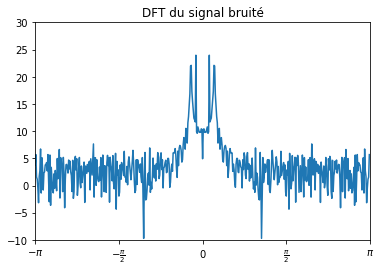

In [12]:
N=500
f1=0.020
f2=0.035
t=np.arange(N)
x=np.sin(2*np.pi*f1*t)+ np.sin(2*np.pi*f2*t)
y=x+np.random.normal(0,0.1,N)


yf=np.fft.fftshift(np.fft.fft(y))
plt.plot(10*np.log10(abs(yf)))
plt.axis([0,N,-10,30])
plt.xticks(np.arange(-0,N+1,N/4),[r'$-\pi$', r'$-\frac{\pi}{2}$','$0$',r'$\frac{\pi}{2}$',r'$\pi$'])

plt.title('DFT du signal bruité')
plt.show()

/home/romain/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


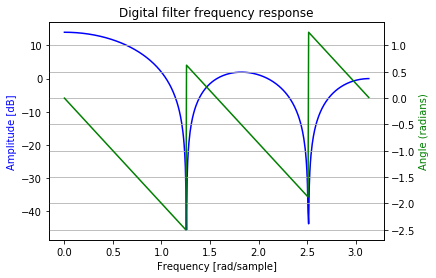

In [13]:
# Filtre MA de longueur 5

w, h = signal.freqz(np.ones(5))
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
plt.show()

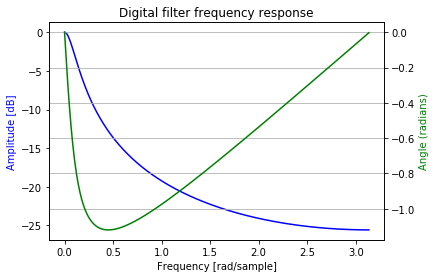

In [14]:
# Intégrateur à fuite
lamda=0.9
a=np.array([1,-lamda])
b=np.array([1-lamda])
w, h = signal.freqz(b,a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
plt.show()

Les résultats obtenus sont cohérents avec les attentes de performances du filtre MA. Pour une faible valeur de M, le signal est très peu déphasé mais présente une efficacité relativement basse (visible sur les représentations temporel et fréquentiel).

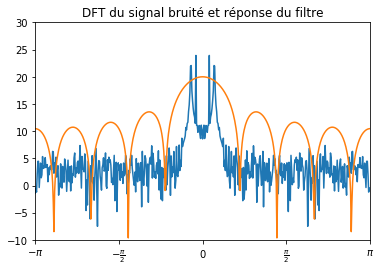

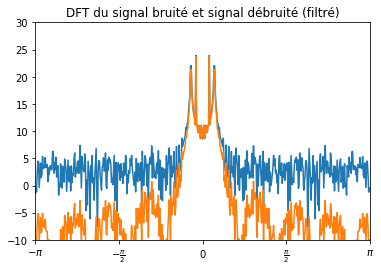

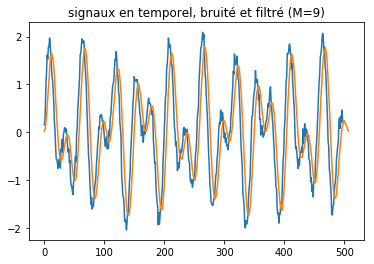

In [15]:
#constantes
N=500
f1=0.020
f2=0.035
M=9

#reponse indicielle du filtre MA
MA=np.zeros(N)
MA[:M]=1/M

#generer le signal
t=np.arange(N)
x=np.sin(2*np.pi*f1*t)+ np.sin(2*np.pi*f2*t)
y=x+np.random.normal(0,0.1,N)

#calcul du signal filtre en temporel (pas besoin de tout les '0' a la fin de MA)
ydf_temp=signal.convolve(y,MA[:M])

#passage en frequence
yf=np.fft.fftshift(np.fft.fft(y))
ym=np.fft.fftshift(np.fft.fft(MA))
#calcul du signal filtre en frequence
ydf=yf*ym #equivalent a fft de ydf_temp

#affichage
plt.title('DFT du signal bruité et réponse du filtre')
plt.plot(10*np.log10(abs(yf)))
plt.plot(10 * np.log10(abs(ym)+1e-8)+20) #on fait +20 pour superposer les deux courbes
plt.axis([0,N,-10,30])
plt.xticks(np.arange(-0,N+1,N/4),[r'$-\pi$', r'$-\frac{\pi}{2}$','$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
plt.show()

plt.title('DFT du signal bruité et signal débruité (filtré)')
plt.plot(10*np.log10(abs(yf)))
plt.plot(10 * np.log10(abs(ydf)))
plt.axis([0,N,-10,30])
plt.xticks(np.arange(-0,N+1,N/4),[r'$-\pi$', r'$-\frac{\pi}{2}$','$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
plt.show()

plt.title('signaux en temporel, bruité et filtré (M=9)')
plt.plot(y)
plt.plot(ydf_temp)
plt.show()
